# Linear Regression
This project deals with an Ecommerce company. This company specializes in online clothing sales while also offering in-store style consultations. Customers visit the store for personalized advice from a stylist and later place orders through either their "mobile app" or "website".

Our task, as contracted consultants, is to assist the company in determining where their primary focus should lie: enhancing the mobile app experience or optimizing their website.

# 1. Import 

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

The Ecommerce Customers CSV file provided by the company contains valuable customer information, including email, address, and avatar color. Additionally, it holds both categorical and numerical data:

Avg. Session Length: The average duration of in-store style advice sessions.

Time on App: The average amount of time spent on the mobile app in minutes.

Time on Website: The average amount of time spent on the website in minutes.

Length of Membership: The duration, in years, for which a customer has been a member.

We will proceed by importing this CSV file and creating a DataFrame named 'Data' to work with."

(Yearly amount spend is target variable and we need to find the relation of all these features with the target)

# 2. Reading the data

In [90]:
Data = pd.read_csv(r"Ecommerce Customers.csv")
Data.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021595,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [91]:
Data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,498.000000,498.000000,498.000000,495.000000,495.000000
mean,33.054953,12.045917,37.063336,3.526269,499.762817
std,0.994011,0.990587,1.009300,1.001067,79.223139
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.344967,11.387235,36.353186,2.926668,445.406013
50%,33.086914,11.980553,37.069367,3.531402,499.140152
75%,33.714649,12.731589,37.717324,4.120463,549.882368
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [92]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                499 non-null    object 
 3   Avg. Session Length   498 non-null    float64
 4   Time on App           498 non-null    float64
 5   Time on Website       498 non-null    float64
 6   Length of Membership  495 non-null    float64
 7   Yearly Amount Spent   495 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# 3. EDA (Explore the data and gets some inferences)

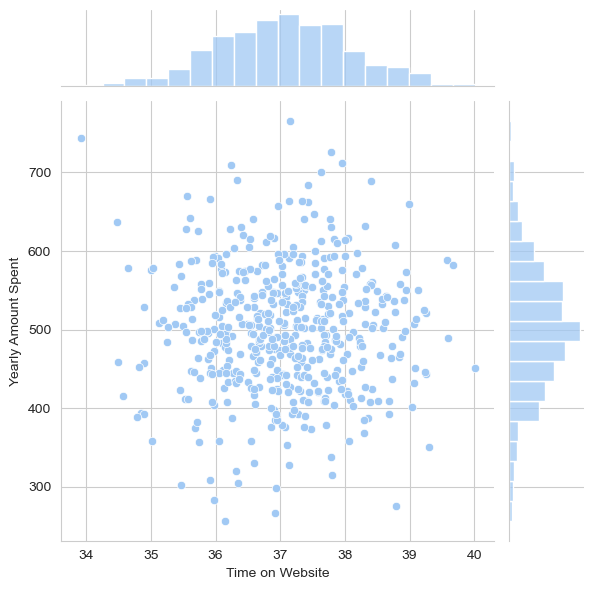

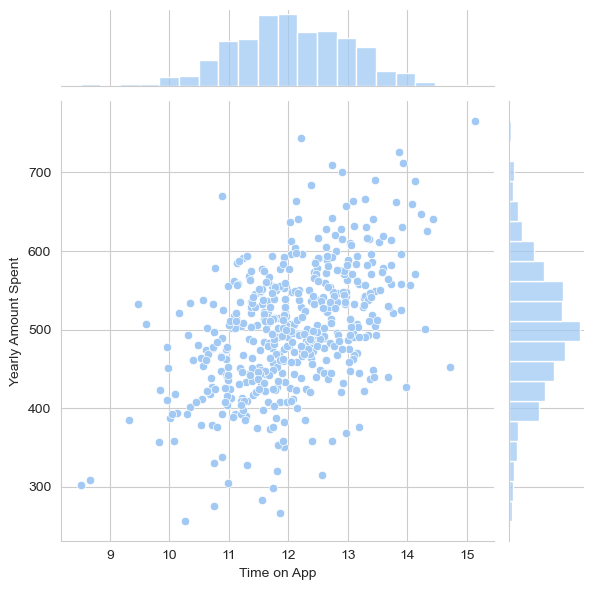

In [93]:
sns.set_palette("pastel")
sns.set_style('whitegrid')

# plot Time on Website v/s Yearly Amount Spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=Data)

# plot Time on App v/s Yearly Amount Spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=Data)

# Inferences
1. As far as trying to interpret the sort of scatterplot there doesn't appear to be a clear trend between time on a Web site and yearly amounts spent just by looking at this visually.
2. It looks like there begins to be some sort of correlation between increased time on app increasing yearly amount spent expenditure.

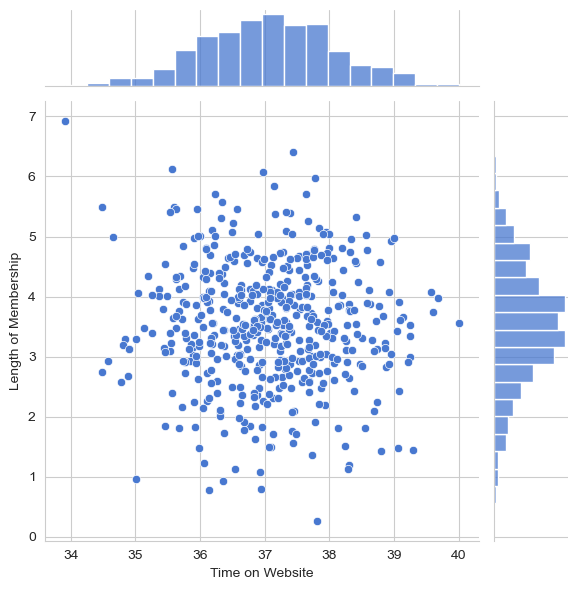

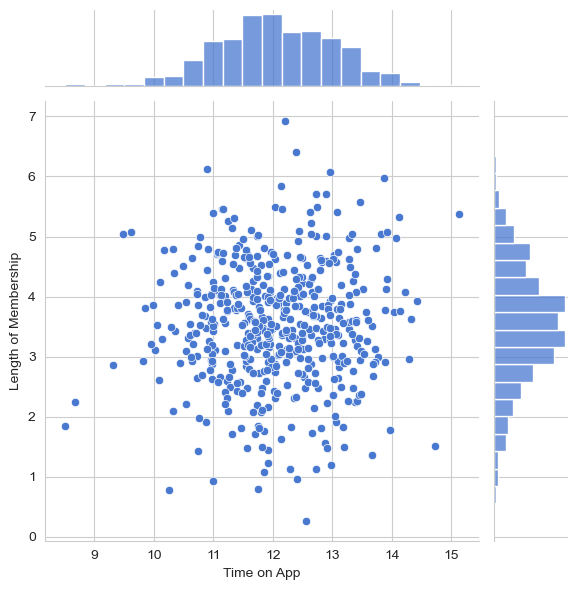

In [94]:
sns.set_palette("muted")
sns.set_style('whitegrid')

# plot Time on Website v/s Length of Membership
sns.jointplot(x='Time on Website',y='Length of Membership',data=Data)

# plot Time on App v/s Length of Membership
sns.jointplot(x='Time on App',y='Length of Membership',data=Data)

# Inferences
1. As far as trying to interpret the sort of scatterplot there doesn't appear to be a clear trend between time on a Web site and Length of Membership just by looking at this visually.
2. As far as trying to interpret the sort of scatterplot there doesn't appear to be a clear trend between time on a App and Length of Membership just by looking at this visually.

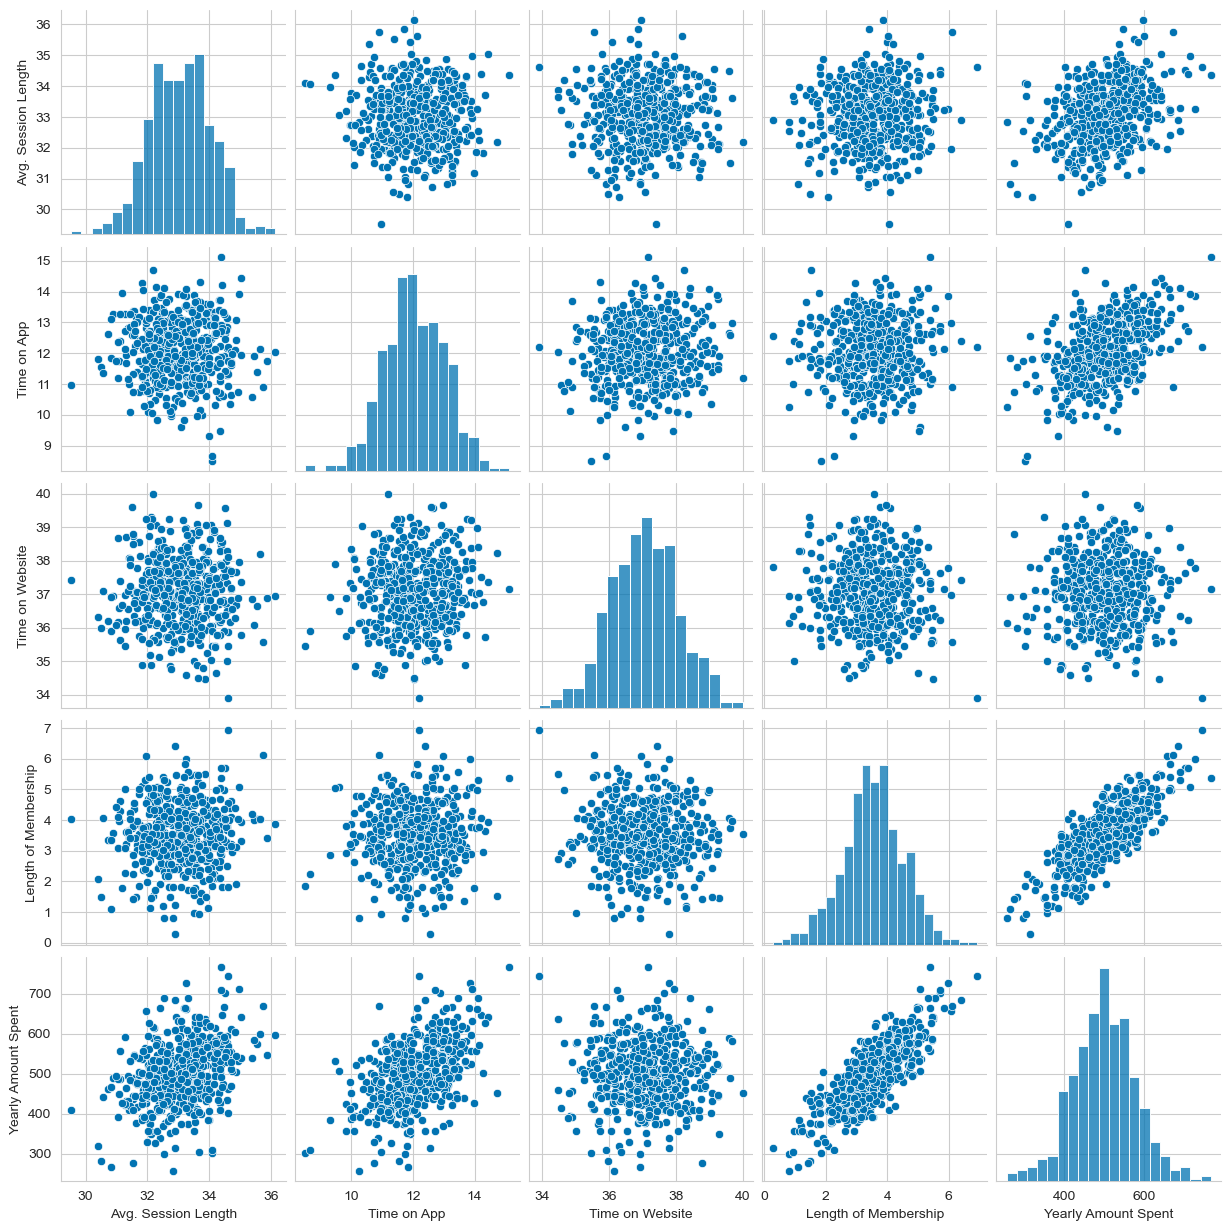

In [95]:
sns.set_palette("colorblind")
sns.set_style('whitegrid')

# Pairplot plots all permutations possible and shows the pictures of relation amongst features
sns.pairplot(Data)

# Inference
Based off this plot "Length of Membership" to be the most correlated feature with "Yearly Amount Spent".

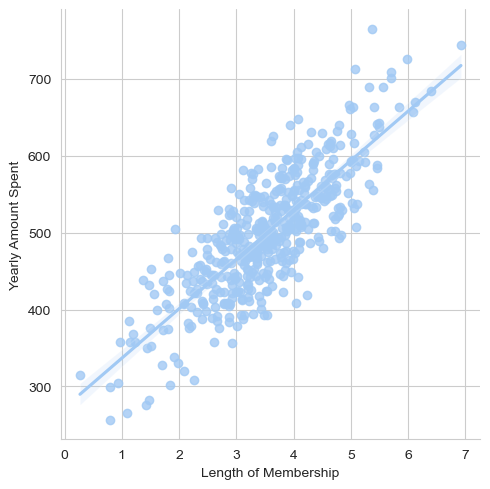

In [96]:
sns.set_palette("pastel")
sns.set_style('whitegrid')

#Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership for rough visualization
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=Data)

# 4. Data cleaning

4.1 Null Value Treatment

In [97]:
(Data.isnull().sum()/len(Data))*100

Email                   0.0
Address                 0.0
Avatar                  0.2
Avg. Session Length     0.4
Time on App             0.4
Time on Website         0.4
Length of Membership    1.0
Yearly Amount Spent     1.0
dtype: float64

In [98]:
# We have few null values as per previous output, lets drop them
Data.dropna(inplace = True)
Data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

4.2 Outliers Treatment

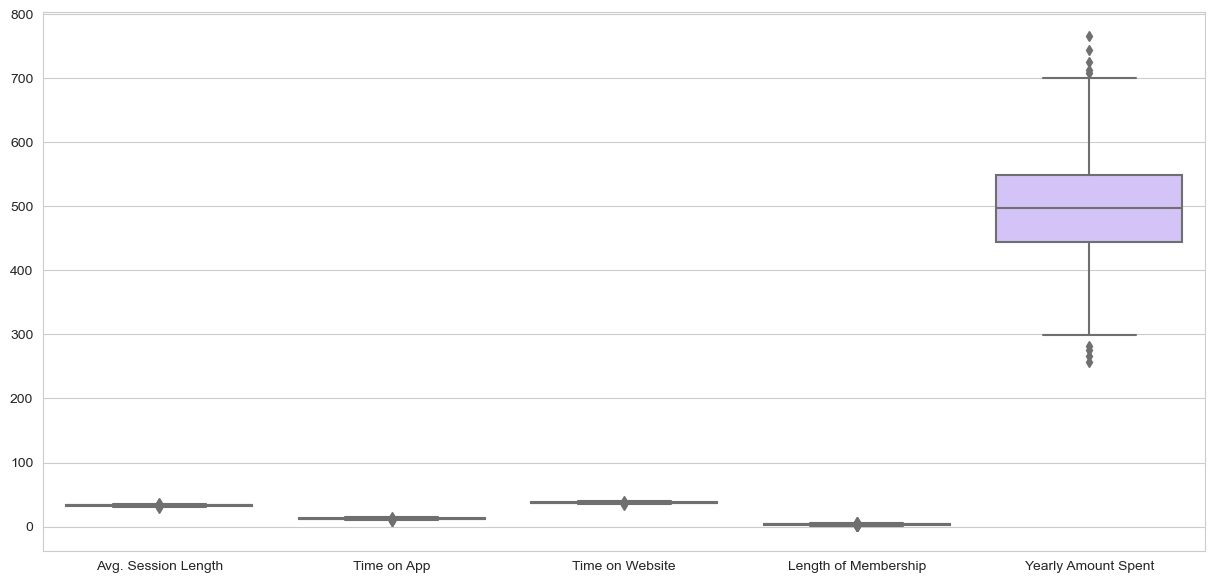

In [99]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']])
plt.show()

In [100]:
from scipy.stats.mstats import winsorize
winsorize(Data['Yearly Amount Spent'],(0.05,0.05),inplace=True)
plt.show()

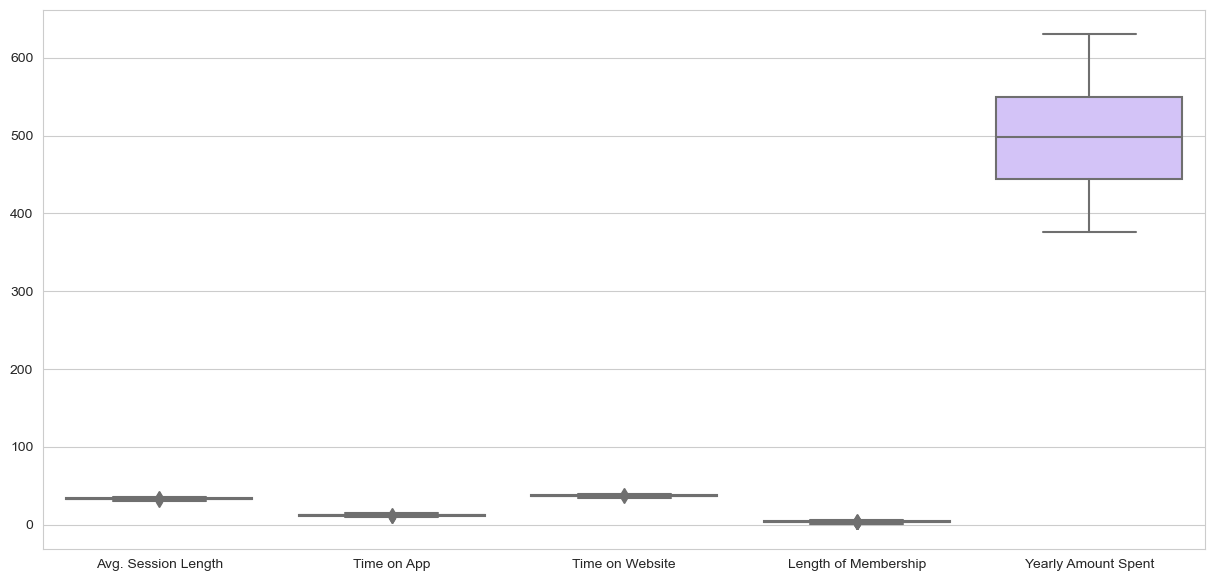

In [101]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership','Yearly Amount Spent']])
plt.show()

# 5. Training and Testing Data 

5.1 Splitting Data in Training and Testing Data

In [102]:
Data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [103]:
#Feature we consider are numerical features stored in "X" which hold meaning, all other columns are omitted

X = Data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

#Target is stored in "Y"

Y = Data['Yearly Amount Spent']

In [104]:
#Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

5.2 Training the model with X_train an Y_train

In [105]:
import statsmodels.api as sm

X_train1 = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_train1).fit()
X_test1 = sm.add_constant(X_test)
predictions = model.predict(X_test1) 

print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.945
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     1445.
Date:                 Wed, 09 Aug 2023   Prob (F-statistic):          8.84e-210
Time:                         15:59:44   Log-Likelihood:                -1426.0
No. Observations:                  340   AIC:                             2862.
Df Residuals:                      335   BIC:                             2881.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

conclusion from result :
"p value of "time on website" is greater than 0.5 so lets remove it"

In [106]:
#create and split Data again removing the Time on website colum
Y2 = Data['Yearly Amount Spent']
X2 = Data[['Avg. Session Length', 'Time on App','Length of Membership']]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=101)

In [107]:
X2_train2 = sm.add_constant(X2_train)

model2 = sm.OLS(Y2_train, X2_train2).fit()
X2_test2 = sm.add_constant(X2_test)
predictions2 = model2.predict(X2_test2) 

print_model2 = model2.summary()
print(print_model2)

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.945
Model:                             OLS   Adj. R-squared:                  0.945
Method:                  Least Squares   F-statistic:                     1931.
Date:                 Wed, 09 Aug 2023   Prob (F-statistic):          1.96e-211
Time:                         15:59:44   Log-Likelihood:                -1426.1
No. Observations:                  340   AIC:                             2860.
Df Residuals:                      336   BIC:                             2875.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

Text(0, 0.5, 'Predictions')

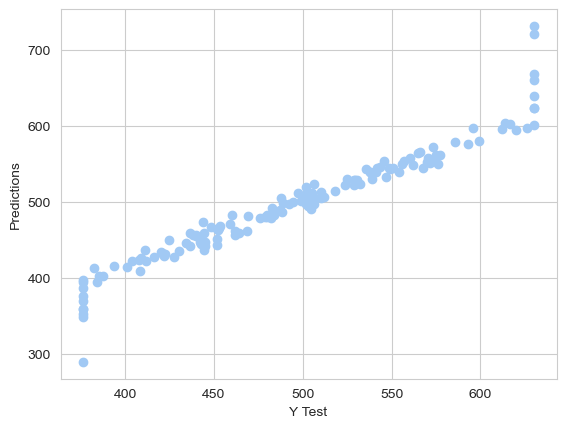

In [108]:
#Creating a scatterplot of the real test values versus the predicted values.

plt.scatter(Y2_test,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

# 6. Evaluating the Model

In [109]:
# calculate these metrics 
from sklearn import metrics

# MAE,MSE,RMSE
print('MAE:', metrics.mean_absolute_error(Y2_test, predictions2))
print('MSE:', metrics.mean_squared_error(Y2_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y2_test, predictions2)))

# R2 Score
R2=metrics.r2_score(Y2_test, predictions2)
print('R2:', R2)

# Adjusted R2 Score
n = len(X2_train)
k= X2.shape[1]

Adjusted_R2 = 1 - ((1 - R2) * (n - 1)) / (n - k - 1)
print('Adjusted R2:', Adjusted_R2)

MAE: 12.102095457100047
MSE: 349.4036010893156
RMSE: 18.692340706538484
R2: 0.9320506314177234
Adjusted R2: 0.9314439406268102


conclusion from result is that we have gotten a very good model with a good fit.

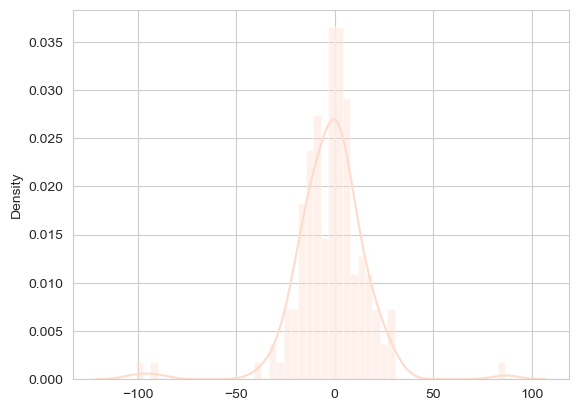

In [112]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Y2_test-predictions2),bins=50);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 23.2494 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 33.5007 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 52.872 total dollars spent**.

**Lets see if the company should focus more on their mobile app or on their website?**


This is tricky, there are two ways to think about this: 
Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. We would want to develop the app and website both but more focus to be given to the app as time on App and length of membership is associated with more increment in total dollars spent.
